#### Probability_distributions/Hypothesis_test/ Simulation)

R has functions for obtaining density, distribution, quantile and random values.<br> dnorm calculates density (pdf) at input x.<br>
pnorm calculates distribution (cdf) at input x.<br>
qnorm calculates the quantile at an input probability.<br.
rnorm generates a random draw from a particular distribution.


In [7]:
dnorm(x = 3, mean = 2, sd = 5) ## pdf at x = 3
pnorm(q = 3, mean = 2, sd = 5) ## cdf  P(X<=3)
qnorm(p = 0.975, mean = 2, sd = 5) ## quantile for probability 0.975

[1] 0.07820854

[1] 0.5792597

[1] 11.79982

<font color = brown >Generate random sample of normal distributiion/ binomomial/ poisson/ F/ Chi-Squared>

null device 
          1

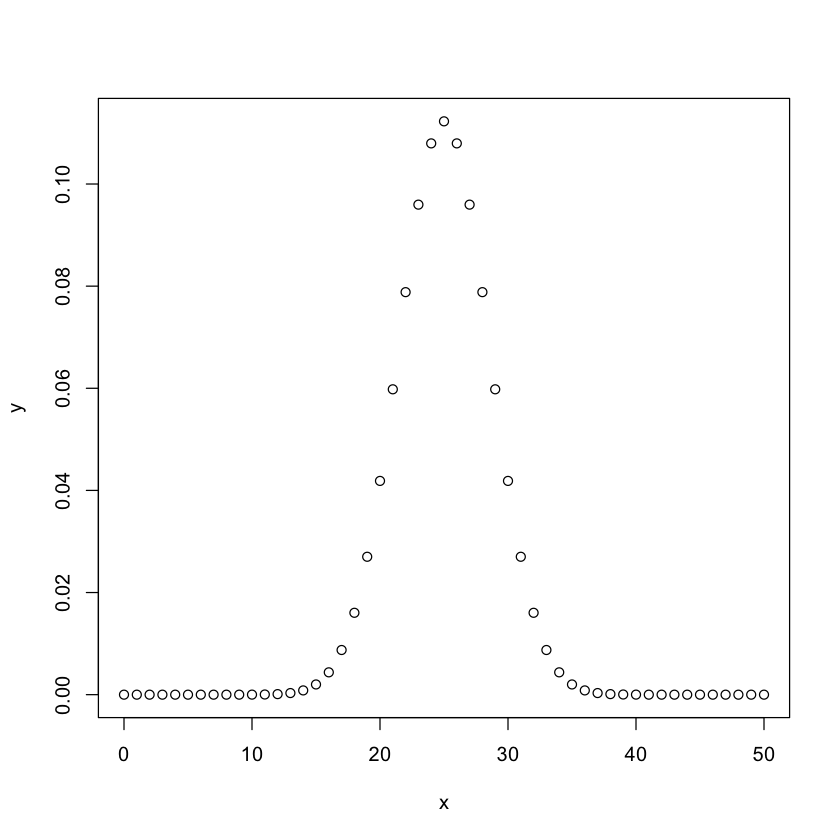

In [12]:
# Create a sample of 50 numbers which are incremented by 1.
x <- seq(0,50,by = 1)

# Create the binomial distribution.
y <- dbinom(x,50,0.5)

# Plot the graph for this sample.
plot(x,y)

# Save the file.
dev.off()


In [15]:
# Probability of getting 26 or less heads from a 51 tosses of a coin.
x <- pbinom(26,51,0.5)
x

[1] 0.610116

In [14]:
# How many heads will have a probability of 0.25 will come out when a coin
# is tossed 51 times.
x <- qbinom(0.25,51,1/2)

print(x)

[1] 23


In [16]:
# Find 8 random values from a sample of 150 with probability of 0.4.
x <- rbinom(8,150,.4)

print(x)

[1] 60 62 55 61 51 63 63 67


In [17]:
dpois(x = 3, lambda = 5)

[1] 0.1403739

##### Examples from 
https://web.stanford.edu/class/bios221/book/Chap-Generative.html <br>
source https://web.stanford.edu/class/bios221/book/index.html<br>
Course Syllabus- Modern Statistical Computing in R:<br>
https://www.upf.edu/documents/8055191/8608462/BSS_modernstcompR_2017/115f0385-f413-cdf3-5a19-cc4162677309<br>
Book:<br>
James, Gareth, Daniela Witten, Trevor Hastie, & Robert Tibshirani (2013). An Introduction to Statistical Learning: <br >With Applications in R. New York: Springer.<br>
Other resources: http://stat.columbia.edu/ma-programs/current-students/statistics-department-resources/


In [19]:
dpois(x = 0:12, lambda = 5)## we want to generate the probabilities of all values from 0 to 12

[1] 0.006737947 0.033689735 0.084224337 0.140373896 0.175467370 0.175467370
 [7] 0.146222808 0.104444863 0.065278039 0.036265577 0.018132789 0.008242177
[13] 0.003434240

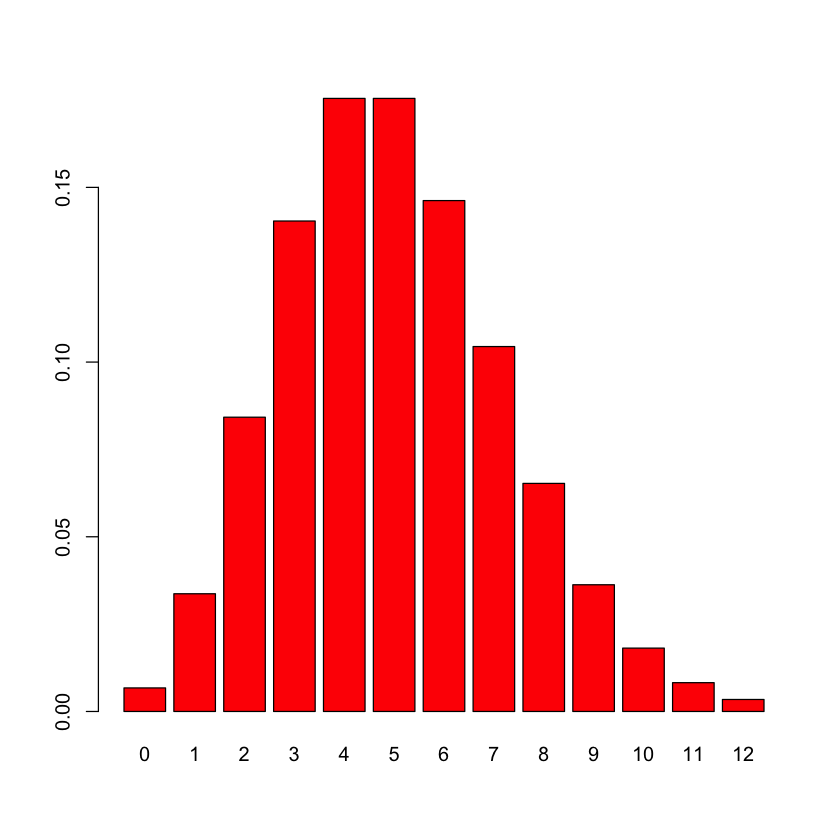

In [20]:
barplot(dpois(0:12, 5), names.arg = 0:12, col = "red")

##### bionomial

In [21]:
rbinom(12, prob = 2/3, size = 1)

[1] 1 1 1 1 1 1 1 1 0 1 1 1

In [26]:
#How many times '1' occurs
rbinom(1, prob = 2/3, size = 12)

[1] 7

### Coin flipping

In [28]:
coinflips = (runif(10000) > 0.5)
table(coinflips)
##coinflips
## FALSE  TRUE 
##  5005  4995

coinflips
FALSE  TRUE 
 4969  5031 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



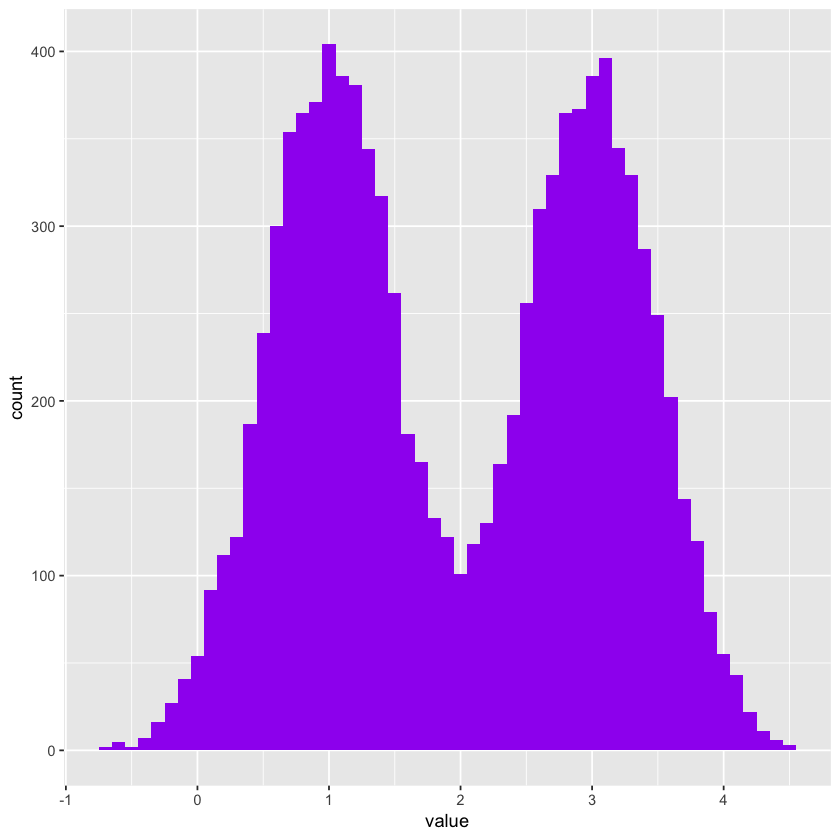

In [29]:
oneFlip = function(fl, mean1 = 1, mean2 = 3, sd1 = 0.5, sd2 = 0.5) {
  if (fl) {
   rnorm(1, mean1, sd1)
  } else {
   rnorm(1, mean2, sd2)
  }
}
fairmix = vapply(coinflips, oneFlip, numeric(1))
library("ggplot2")
library("dplyr")
ggplot(tibble(value = fairmix), aes(x = value)) +
     geom_histogram(fill = "purple", binwidth = 0.1)

###### Plot a histogram of those values of fair$values for which coinflips is TRUE.

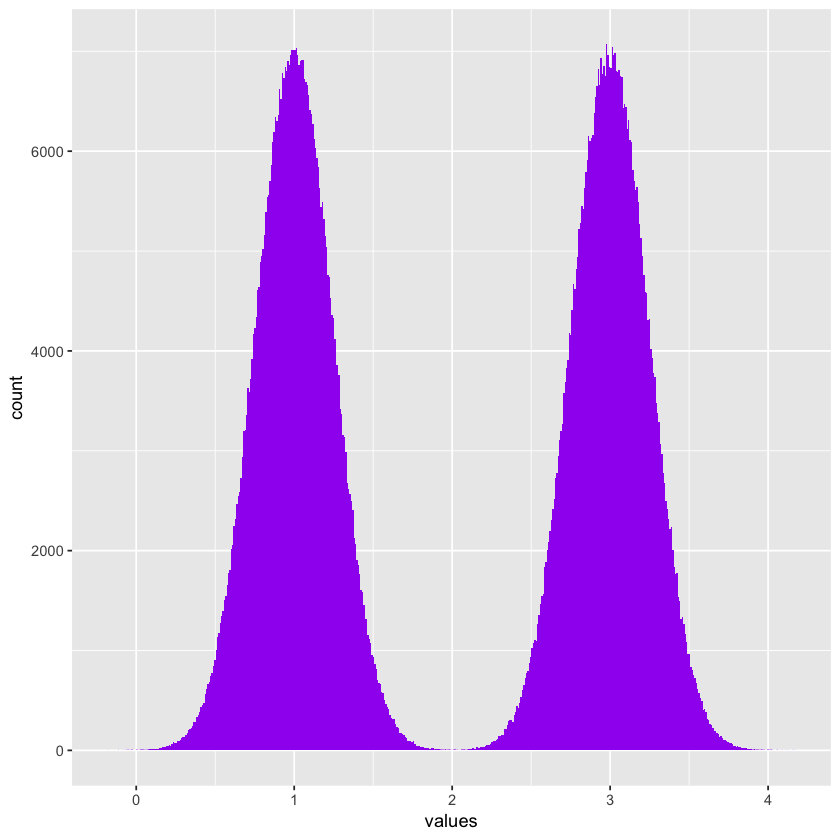

In [34]:
means = c(1, 3)
sds   = c(0.25, 0.25)
values = rnorm(length(coinflips),
          mean = ifelse(coinflips, means[1], means[2]),
          sd   = ifelse(coinflips, sds[1],   sds[2]))
fair = tibble(
  coinflips = (runif(1e6) > 0.5),
  values = rnorm(length(coinflips),
               mean = ifelse(coinflips, means[1], means[2]),
               sd   = ifelse(coinflips, sds[1],   sds[2])))
ggplot(fair, aes(x = values)) +
     geom_histogram(fill = "purple", bins = 500)

In [30]:
ggplot(dplyr::filter(fair, coinflips), aes(x = values)) +
   geom_histogram(aes(y = ..density..), fill = "purple",
                  binwidth = 0.01) +
   stat_function(fun = dnorm,
          args = list(mean = means[1], sd = sds[1]), color = "red")


ERROR: Error in dplyr::filter(fair, coinflips): object 'fair' not found


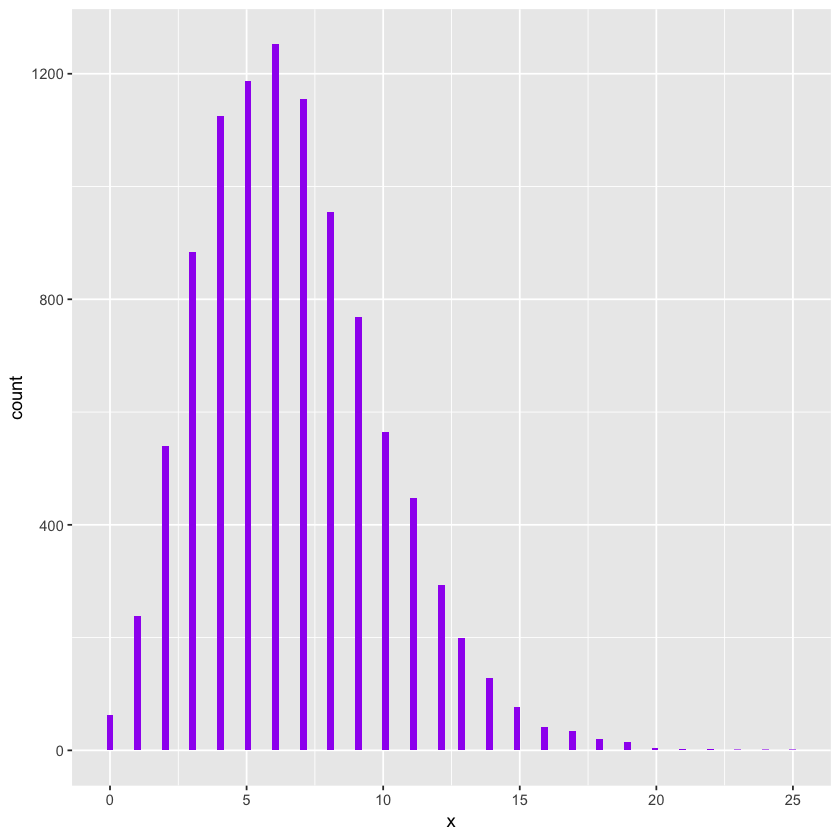

In [36]:
### gamma poison mixture
lambda = rgamma(10000, shape = 10, rate = 3/2)
gp = rpois(length(lambda), lambda = lambda)
ggplot(tibble(x = gp), aes(x = x)) +
  geom_histogram(bins = 100, fill= "purple")